# **A linear regression model and Bland-Altman plot**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, t

In [ ]:
im = np.array([
    61.2, 306.64, 180.4, 376.4, 185.1, 253.6, 206.1333333,
    114.2375, 82.46666667, 94.3, 344.1, 272.4
])

pm = np.array([
    59.66666667, 321.1666667, 163.2, 345.7878788, 204.5, 242.2,
    144.0333333, 112.6666667, 82.36, 127.225, 347.96, 257.0333333
])

## **A linear regression model**


In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(im, pm)
r_squared = r_value**2

In [ ]:
t_stat = (slope - 1) / std_err
df = len(im) - 2
p_value_slope_vs_1 = 2 * (1 - t.cdf(np.abs(t_stat), df))

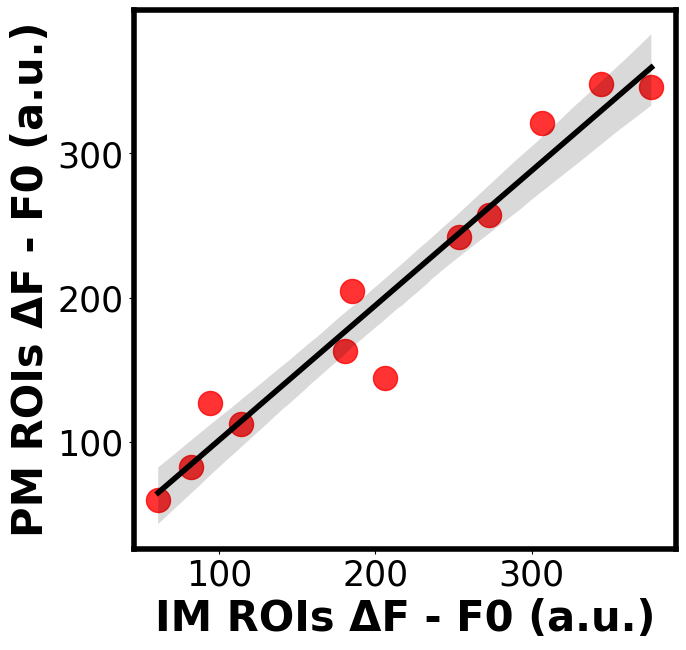

In [ ]:
plt.figure(figsize=(7, 7))
sns.regplot(x=im, y=pm, scatter_kws={"color": "red", "s": 300},
            line_kws={"color": "black", "linewidth": 4})
plt.xlabel("IM ROIs ΔF - F0 (a.u.)", fontsize=30, fontweight='bold')
plt.ylabel("PM ROIs ΔF - F0 (a.u.)", fontsize=30, fontweight='bold')
plt.grid(False)

for spine in plt.gca().spines.values():
    spine.set_linewidth(4)

plt.tick_params(axis='both', which='major', labelsize=25)
plt.show()

In [ ]:
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"R²: {r_squared:.3f}")
print(f"p-value: {p_value:.3g}")
print(f"Standard Error: {std_err:.3f}")

print(f"t-statistic (slope = 1): {t_stat:.3f}")
print(f"p-value (slope = 1): {p_value_slope_vs_1:.3g}")

Slope: 0.935
Intercept: 7.693
R²: 0.945
p-value: 1.23e-07
Standard Error: 0.071
t-statistic (slope = 1): -0.917
p-value (slope = 1): 0.381


## **Bland-Altman plot**

In [ ]:
mean_values = (im + pm) / 2
diff = im - pm
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
upper_limit = mean_diff + 1.96 * std_diff
lower_limit = mean_diff - 1.96 * std_diff

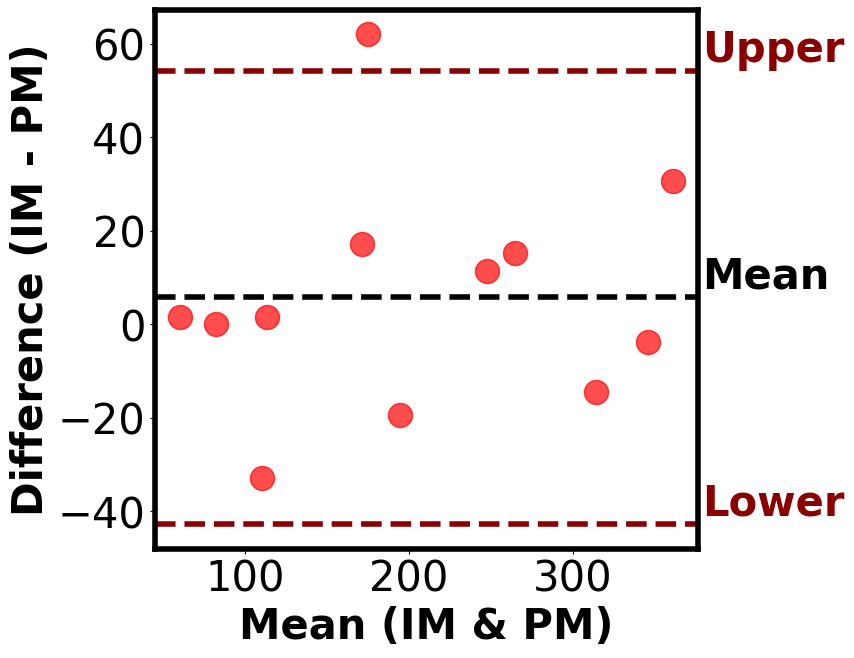

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(mean_values, diff, color="red", alpha=0.7, s=300)
plt.axhline(mean_diff, linestyle="--", color="black", linewidth=4)
plt.axhline(upper_limit, linestyle="--", color="darkred", linewidth=4)
plt.axhline(lower_limit, linestyle="--", color="darkred", linewidth=4)
x_pos = np.max(mean_values) * 1.05
plt.text(x_pos, upper_limit, "Upper",
         fontsize=30, color="darkred", fontweight='bold', va='bottom', ha='left')
plt.text(x_pos, mean_diff, "Mean",
         fontsize=30, color="black", fontweight='bold', va='bottom', ha='left')
plt.text(x_pos, lower_limit, "Lower",
         fontsize=30, color="darkred", fontweight='bold', va='bottom', ha='left')
plt.xlabel("Mean (IM & PM)", fontsize=30, fontweight='bold')
plt.ylabel("Difference (IM - PM)", fontsize=30, fontweight='bold')
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_linewidth(4)
plt.tick_params(axis='both', which='major', labelsize=30)

plt.show()